# **AP155 Lab Assignment** 
## Module 6: Partial Differential Equations

_Instructions_: Answer each problem as completely as you can. Discuss **all** your answers as clearly and concisely as possible. 

_Scoring Criteria_: 50% - *correctness of code*; 50% - *discussion of the code and results*. Maximum score is **100 points** (Problems 1 and 2 are worth 50 points each).

_Due Date_: **5PM of December 21 (Tue)**


# READ ME:

There are two cells below desginated for animating. These cells take up a relatively huge amount of power, so be careful. 
Some cells of code require you to run every cell at once since they reference variables from other cells. In this case,
you can comment out the animation cells to avoid running them. 

### Student Information 

_Full Name (Last Name, First Name)_: Soriano, Edneil E. Jr.\
_Student No._: 2020-02420 \
_Section_: HX-2

### Submission Information

_Date and Time Submitted (most recent upload)_: 

**HONOR PLEDGE** I affirm that I have upheld the highest principles of honesty and integrity in my academic work and that this lab assignment is my own work.

**Sign here with your full name:** 

### Grading Information (c/o Lab Instructor)

TOTAL SCORE: **100**/100

Score breakdown:
* Problem 1 - 50/50
* Problem 2 - 50/50

_Date and Time Scored (MM/DD/YYYY HH:MM AM/PM):_ 

### PROBLEM 1 (50 pts.; 50/50 for code & discussion) 
**The Schrodinger equation and the Crank-Nicolson method**

_Refer to Exercise 9.8 in the Newman text._ In this problem, you will use the Crank-Nicolson method to solve the full time-dependent Schrodinger equation and hence develop a picture of how a wavefunction evolves over time.

Consider an electron (mass $M = 9.109 \times 10^{-31}$ kg) in a box of length $L = 10^{-8}$ m. Suppose that at time $t = 0$ the wavefunction of the electron has the form

$$ \psi(x,0) = \exp\left[-\frac{(x-x_0)^2}{2\sigma^2}\right]e^{i\kappa x},$$
where $x_0 = \frac{L}{2}$, $\sigma = 1 \times 10^{-10}$ m, $\kappa = 5 \times 10^{10} {\rm m}^{-1}$,  and $\psi = 0$ on the walls at $x = 0$ and $x = L$.

1. Perform a single step of the Crank-Nicolson method for this electron, calculating the vector $\psi(t)$ of values of the wavefunction, given the initial wavefunction above and using $N = 1000$ spatial slices with $a = L/N$. Your program will have to perform the following steps. First, given the vector $\psi(0)$ at $t = 0$, you will have to multiply by the matrix $\bf{B}$ to get a vector $\bf{v} = \bf{B}\psi$. Because of the tridiagonal form of $\bf{B}$, this is fairly simple. The $i$th component of $\bf{v}$ is given by
$$ v_i = b_1\psi_i + b_2(\psi_{i+1} + \psi_{i-1}).$$

   You will also have to choose a value for the time-step $h$. A reasonable choice is $h = 10^{-18}$ s. *(15 pts.)*

2. Second you will have to solve the linear system ${\bf Ax}= {\bf v}$ for $\bf{x}$, which gives you the new value of $\psi$. You could do this using a standard linear equation solver like the function $\tt solve$ in numpy's $\tt linalg$. *(10 pts.)*

3. Once you have the code in place to perform a single step of the calculation, extend your program to perform repeated steps and hence solve for $\psi$ at a sequence of times a separation $h$ apart. Note that the matrix $\bf A$ is independent of time, so it doesn't change from one step to another. You can set up the matrix just once and then keep on reusing it for every step. *(15 pts.)*

4. Make an animation of the solution by displaying the real part of the wavefunction at each time-step. You can use the function rate from the package visual to ensure a smooth frame-rate for your animation-- see Section 3.5 on page 117 of the Newman text. 

   Run your animation for a while and describe what you see. Write a few sentences explaining in physics terms what is going on in the system. *(10 pts.)*

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
import imageio
import scipy.fftpack as spfft

Below is Newman's code. It is a faster version of numpy.linalg.solve given tridiagonal matrices. However, we would need to convert the matrix into a banded form. Newman's banded form is unique, scipy requires a different format. 

In [2]:
######################################################################
#
# Function to solve a banded system of linear equations using
# Gaussian elimination and backsubstitution
#
# x = banded(A,v,up,down)
#
# This function returns the vector solution x of the equation A.x = v,
# where v is an array representing a vector of N elements, either real
# or complex, and A is an N by N banded matrix with "up" nonzero
# elements above the diagonal and "down" nonzero elements below the
# diagonal.  The matrix is specified as a two-dimensional array of
# (1+up+down) by N elements with the diagonals of the original matrix
# along its rows, thus:
#
#   (  -   -  A02 A13 A24 ...
#   (  -  A01 A12 A23 A34 ...
#   ( A00 A11 A22 A33 A44 ...
#   ( A10 A21 A32 A43 A54 ...
#   ( A20 A31 A42 A53 A64 ...
#
# Elements represented by dashes are ignored -- it doesn't matter what
# these elements contain.  The size of the system is taken from the
# size of the vector v.  If the matrix A is larger than NxN then the
# extras are ignored.  If it is smaller, the program will produce an
# error.
#
# The function is compatible with version 2 and version 3 of Python.
#
# Written by Mark Newman <mejn@umich.edu>, September 4, 2011
# You may use, share, or modify this file freely
#
######################################################################

from numpy import copy

def banded(Aa,va,up,down):

    # Copy the inputs and determine the size of the system
    A = copy(Aa)
    v = copy(va)
    N = len(v)

    # Gaussian elimination
    for m in range(N):

        # Normalization factor
        div = A[up,m]

        # Update the vector first
        v[m] /= div
        for k in range(1,down+1):
            if m+k<N:
                v[m+k] -= A[up+k,m]*v[m]

        # Now normalize the pivot row of A and subtract from lower ones
        for i in range(up):
            j = m + up - i
            if j<N:
                A[i,j] /= div
                for k in range(1,down+1):
                    A[i+k,j] -= A[up+k,m]*A[i,j]

    # Backsubstitution
    for m in range(N-2,-1,-1):
        for i in range(up):
            j = m + up - i
            if j<N:
                v[m] -= A[i,j]*v[j]

    return v

In [3]:
h = 1e-18*10            # the funne quantum constant :kek:
hbar = 1.0546e-36
L = 1e-8                # the size of the well is L accdg. to the problem
M = 9.109e-31           # electron mass in kg
N = 1000                # slices according to the prob
a = L/N                 # width of each slice, not to be confused with elements of A
x_o = L/2               # constant defined in the problem, dictated the location of the initial center
sigma = 1e-10           # constant defined in the problem
k = 5e10                # this is kappa, hehehehe

"""
Now, we initialize the elements for matrix A
"""
a1 = 1 + h*hbar/2/M/a**2*1j
a2 = -h*hbar*1j/4/M/a**2
"""
Now, we initialize the elements for matrix B
"""
b1 = 1 - h*hbar/2/M/a**2*1j
b2 =h*hbar*1j/4/M/a**2



psi = np.zeros(N+1,complex)    # if we have N slices, we have N+1 elements (imagine 3 slices first para madali)

def psi_ini(x):
    return np.exp(-(x-x_o)**2/2/sigma**2)*np.exp(1j*k*x)   # just the initial wave function given above

x = np.linspace(0,L,N+1)       # we get evenly spaced sample points from O to L
psi[:] = psi_ini(x)         # instead of using a for loop to call the function for each element, we do this

psi[[0,N]]=0                # these are the boundary conditions, we "hard set" them ALWAYS                


A = np.empty((3,N),complex)   # we define the banded matrix not as a square, but as dictated by Newman's banded.py

A[0,:] = a2   # upper diagonal
A[1,:] = a1   # main diagonal
A[2:,] = a2   # lower diagonal

We now have an array(vector) psi that contains the values for the initial wave function. Now, we can multiply this
to the matrix B from the Newman text to obtain v. Since B is a tridiagonal matrix, the ith element of v is stated in 
the formula above: $$ v_i = b_1\psi_i + b_2(\psi_{i+1} + \psi_{i-1}).$$ 

We also rewritten the tridiagonal matrix A into the banded form prescribed by Newman's code in the cell above. Since we 
now have matrix A and the vector v, 

If we let $\lambda$ be the wave function at another time:  $$\lambda = \psi(x,\ t + h_{step})$$ Then all we need to do is solve for the eigenvalue equation:

$$\bf{A} \lambda  =  \bf{B}$$

We can use np.linalg.solve, but Newman wrote a faster code banded.py to skip all the zeroes in the matrix. We pass it to a for loop to loop the looping program with several iterations of desired looping. We can change the argument of the for loop; a higher number means more time has passed. One loop corresponds to $10^{-18}s$

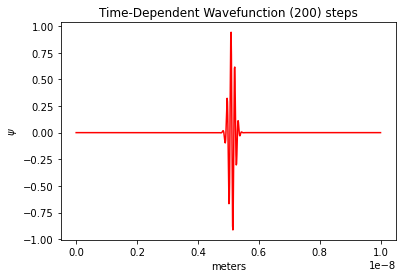

In [4]:
"""
IF YOU WANT TO START FROM STEP = 0, RUN ALL CELLS AFTER CHANGING STEPS, COMMENT OUT ALL ANIMATION CELLS 
IF YOU WANT TO START FROM STEP = 0, RUN ALL CELLS AFTER CHANGING STEPS, COMMENT OUT ALL ANIMATION CELLS 
IF YOU WANT TO START FROM STEP = 0, RUN ALL CELLS AFTER CHANGING STEPS, COMMENT OUT ALL ANIMATION CELLS 
"""

def psi_evolve(steps):
    for i in range(steps):         
        v = b1*psi[1:N] + b2*(psi[2:N+1] + psi[0:N-1])  # solve for the ith element of v
        psi[1:N] = banded(A,v,1,1)         # use v to calculate the next iteration for psi, overwrite the old iteration
    return psi

steps = 200
psi = psi_evolve(steps)        # do the process for whatever steps

# We plot the real part of the wavefunction. The imaginary part is safely neglected. The detailed reason why is
# derived in a Quantum class, but basically all eigenfunctions can be taken as real. 

fig, ax = plt.subplots()
ax.plot(x, np.real(psi), color='r')  
ax.set_xlabel('meters')
ax.set_ylabel('$\psi$')
plt.title('Time-Dependent Wavefunction (' + str(steps) + ") steps")

plt.show()

In [5]:
"""
THIS IS AN ANIMATION CELL, THIS IS AN ANIMATION CELL, THIS IS AN ANIMATION CELL, THIS IS AN ANIMATION CELL
Now, we animate :  https://towardsdatascience.com/basics-of-gifs-with-pythons-matplotlib-54dd544b6f30
RUN ALL CELLS, THE VARIABLE steps IS DEFINED IN THE CELL IMMEDIATELY ABOVE
RUN ALL CELLS, THE VARIABLE steps IS DEFINED IN THE CELL IMMEDIATELY ABOVE
RUN ALL CELLS, THE VARIABLE steps IS DEFINED IN THE CELL IMMEDIATELY ABOVE
RUN ALL CELLS, THE VARIABLE steps IS DEFINED IN THE CELL IMMEDIATELY ABOVE
"""
filenames = []
for i in range(steps):
    if i % 50 == 0:    # do it if the current step is a multiple of 50; you can increase to drop fps AND computation time
        plt.plot(x, np.real(psi_evolve(i)), color='r')  # plot psi_evolve(i) - which is the current steps
        plt.ylim(-1, 1)
        plt.xlabel('meters')
        plt.ylabel('$\psi$')
        plt.title('Time-Dependent Wavefunction (' + str(steps) + ") iterations")
    
        # create file name and append it to a list
        filename = f'{i}.png'
        filenames.append(filename)
        
        # save frame
        plt.savefig(filename)
        plt.close()
        
    else: 
        continue
        
# build gif, it's semi-readable but I just got it from the website
with imageio.get_writer('wavefunc.gif', mode='I') as writer:
    for filename in filenames:
        image = imageio.imread(filename)
        writer.append_data(image)

# Remove files from directory
for filename in set(filenames):
    os.remove(filename)

A copy of the gif is provided in the same github repo directory under the filename:

$$\bf{"wavefunc.gif"}$$

It shows that the particle will bounce inside the 1D "box" it is constrained on. However, the wave function becomes less and less localized as time goes on. I think this is Heisenberg's uncertainty principle in action. More movement meant less precision for the position of the particle. 

This exercise was quite hard, but it's pretty cool! I know that my animation algorithm isn't the most efficient, but I've spent more time (about 5x more time) on the animation than the problem so I'm gonna do the sane thing and stop, be contented, and live a happy life.

### PROBLEM 2 (50 pts.; 50/50 for code & discussion)

**The Schrodinger equation and the spectral method**

_Refer to Exercise 9.9 in the Newman text._ In this problem, you will use the spectral method to solve the time-dependent Schodinger equation for the same system as in Problem 1, a single particle in one dimension in a box of length $L$ with impenetrable walls. 

To perform the fast transforms needed for this problem, you can use the scipy $\tt fftpack$ package's discrete sine transform $\tt dst$ ([documentation](https://docs.scipy.org/doc/scipy/reference/generated/scipy.fftpack.dst.html)) and inverse discrete sine transform $\tt idst$ ([documentation](https://docs.scipy.org/doc/scipy/reference/generated/scipy.fftpack.idst.html)). Alternatively, you can use the corresponding functions in the $\tt dcst$ package in Appendix E of the Newman text. 

1. Calculate the values of the coefficients $b_k$ which for convenience can be broken down into their real and imaginary parts as $b_k = \alpha_k + i \eta_k$· Divide the box into $N = 1000$ slices and create two arrays containing the real and imaginary parts of $\psi(x_n,0)$ at each grid point. Perform discrete sine transforms on each array separately and hence calculate the values of the $\alpha_k$ and $\eta_k$ for all $k=1$...$N-1$. *(15 pts.)*

2. Putting $b_k = \alpha_k +i \eta_k$ in the solution above and taking the real part we get $ {\rm Re}\ \psi(x_n, t) $ equals
$$\frac{1}{N} \sum_{k=1}^{N-1} \left[\alpha_k \cos\left(\frac{\pi^2\hbar k^2}{2ML^2}t\right) - \eta_k \sin\left(\frac{\pi^2\hbar k^2}{2ML^2}t\right)\right]\sin\left(\frac{\pi kn}{N}\right)$$
for the real part of the wavefunction. This is an inverse sine transform with coefficients equal to the quantities in the square brackets. 

   Calculate the real part of the wavefunction $\psi(x,t)$ at an arbitrary time $t$ using this formula and the inverse discrete sine transform function. *(10 pts.)* 
   
3. Test your program by making a graph of the wavefunction at time $t = 10^{-16}$ s. *(10 pts.)*

4. Make an animation of the wavefunction over time, similar to that described in part (4) of Problem 1 above. A suitable time interval for each frame of the animation is about $10^{-18}$ s. Run your animation for a while and describe what you see. Write a few sentences explaining in physics terms what is going on in the system. *(15 pts.)*


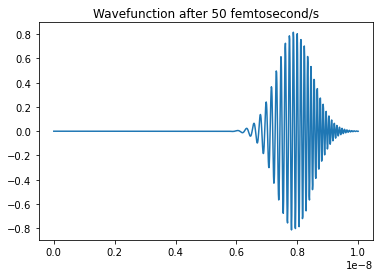

In [6]:
"""
THIS CELL REQUIRES YOU TO RUN ALL CELLS, COMMENT OUT ALL ANIMATION CELLS
THIS CELL REQUIRES YOU TO RUN ALL CELLS, COMMENT OUT ALL ANIMATION CELLS
THIS CELL REQUIRES YOU TO RUN ALL CELLS, COMMENT OUT ALL ANIMATION CELLS
"""



psi[:] = psi_ini(x)       # we assign the values of the initial wave function again because we changed it in cells above
psi[[0,N]]=0              # these are the boundary conditions, we "hard set" them ALWAYS 

alpha = spfft.dst(np.real(psi))     # calculate fourier coefficients, this is the real part
eta = spfft.dst(np.imag(psi))       # this is the imaginary part



femto = 50                 # type time in femotseconds here
t = femto*(10**-15)         # convert to seconds
def solve_spectral(t):
    
    k = np.arange(1,N+2)        # initialize k 

    alpha_coeff = alpha*np.cos(np.pi**2*hbar*k**2/2/M/L**2*t)    # use the formula above
    eta_coeff = eta*np.sin(np.pi**2*hbar*k**2/2/M/L**2*t)

    psi_new = spfft.idst(alpha_coeff + eta_coeff)/N         # add them, get the inverse transform to get the psi 
    return psi_new
psi_new = solve_spectral(t)
plt.plot(x, psi_new)
plt.title("Wavefunction after " + str(femto) + " femtosecond/s")
plt.show()

In [9]:
"""
THIS IS AN ANIMATION CELL, THIS IS AN ANIMATION CELL, THIS IS AN ANIMATION CELL, THIS IS AN ANIMATION CELL
Now, we animate :  https://towardsdatascience.com/basics-of-gifs-with-pythons-matplotlib-54dd544b6f30
RUN ALL CELLS, THE VARIABLE steps IS DEFINED IN THE CELL IMMEDIATELY ABOVE
RUN ALL CELLS, THE VARIABLE steps IS DEFINED IN THE CELL IMMEDIATELY ABOVE
RUN ALL CELLS, THE VARIABLE steps IS DEFINED IN THE CELL IMMEDIATELY ABOVE
RUN ALL CELLS, THE VARIABLE steps IS DEFINED IN THE CELL IMMEDIATELY ABOVE
"""

time_end = 500    # in femtoseconds (1e-15)

filenames = []

for femto in range(time_end):
    if femto % 5 == 0:                 # only render multiples of 5 femtoseconds
        t = femto*(10**-15)            # convert to seconds
        psi_new = solve_spectral(t)    # solve for psi at time t
        
        # plot current psi
        plt.plot(x, psi_new, color='r')
        plt.ylim(-1, 1)
        plt.xlabel('meters')
        plt.ylabel('$\psi$')
        plt.title("Wavefunction after " + str(femto) + " femtosecond/s")
        
        # create file name and append it to a list
        filename = f'{femto}.png'
        filenames.append(filename)
        
        # save frame
        plt.savefig(filename)
        plt.close()
    else:
        continue

# build gif, it's semi-readable but I just got it from the website
with imageio.get_writer('wavefunc_spec.gif', mode='I') as writer:
    for filename in filenames:
        image = imageio.imread(filename)
        writer.append_data(image)

# Remove files from directory
for filename in set(filenames):
    os.remove(filename)

A copy of the gif is provided in the same github repo directory under the filename:

$$\bf{"wavefunc\_spec.gif"}$$

It shows the same behaviour as the previous, with the particle bouncing around the 1D box with a duration of about 500 femtoseconds. However, this method produces the wave function at a time t even without information from previous states. Hence, it is much much faster than the previous method. The animation time went from waiting minutes to mere seconds. 